In [ ]:
!pip3 install pyarrow bertopic

In [286]:
import pandas as pd
df = pd.read_feather("reviews_with_sentiment.feather")

In [287]:
# use bertopic to create topics and show the trend of topics over time
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer    

In [288]:
company = "google"

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

topic_model = BERTopic(vectorizer_model=vectorizer_model, nr_topics="auto", diversity=0.2)
docs = df[df["company"] == company]["pros_and_cons"].tolist()
topics, probs = topic_model.fit_transform(docs)

df["date"] = df["date"].apply(lambda x: x.replace(day=1))

timestamps = df[df["company"] == company].date.to_list()
reviews = df[df["company"] == company].pros_and_cons.to_list()


In [291]:
topics_over_time = topic_model.topics_over_time(reviews, timestamps)
topics_over_time = topics_over_time[topics_over_time["Timestamp"] >= "2018-01-01"]
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertext': [<b>Topic 0</b><br>Words: work, company, google, scale,
                            balance, <b>Topic 0</b><br>Words: google, engineer,
                            company, chief, environment, <b>Topic 0</b><br>Words:
                            work, google, engineer, hardware, projects, <b>Topic
                            0</b><br>Words: google, work, company, decline, news,
                            <b>Topic 0</b><br>Words: level, google, engineer,
                            india, profession, <b>Topic 0</b><br>Words: engineer,
                            company, software, smart, businiss, <b>Topic
                            0</b><br>Words: google, company, intelligence, mtv,
                            management, <b>Topic 0</b><br>Words: google, work,
                            meetings, benefits, company, <b>Topic 0</b><br>Words:
                            google, data, products, company, privacy, <b>Topic
                            0</b><br>Words: projects, place, company, google,
                            environment, <b>Topic 0</b><br>Words: google, code,
                            work, impact, office, <b>Topic 0</b><br>Words: wa,
                            amazons, influenced, google, culture, <b>Topic
                            0</b><br>Words: company, engineering, culture,
                            engineer, challenges, <b>Topic 0</b><br>Words: company,
                            work, management, salary, interview, <b>Topic
                            0</b><br>Words: residents, place, company, culture,
                            employment, <b>Topic 0</b><br>Words: google, work,
                            company, managers, benefits, <b>Topic 0</b><br>Words:
                            google, company, leadership, degree, salary, <b>Topic
                            0</b><br>Words: google, company, food, culture,
                            environment, <b>Topic 0</b><br>Words: google, company,
                            smart, engineering, offices, <b>Topic 0</b><br>Words:
                            finance, company, google, org, place, <b>Topic
                            0</b><br>Words: work, google, company, place, culture,
                            <b>Topic 0</b><br>Words: place, company, culture,
                            environment, job, <b>Topic 0</b><br>Words: work,
                            company, place, money, institutionalized, <b>Topic
                            0</b><br>Words: place, work, smart, company,
                            experience, <b>Topic 0</b><br>Words: google, place,
                            company, employees, perks, <b>Topic 0</b><br>Words:
                            work, company, place, perks, benefits, <b>Topic
                            0</b><br>Words: company, google, place, culture, perks,
                            <b>Topic 0</b><br>Words: datacenter, company, floor,
                            google, food, <b>Topic 0</b><br>Words: company, work,
                            google, place, software, <b>Topic 0</b><br>Words: work,
                            company, google, place, pay, <b>Topic 0</b><br>Words:
                            underleveled, company, employees, environment, balance,
                            <b>Topic 0</b><br>Words: work, company, place, culture,
                            job, <b>Topic 0</b><br>Words: work, company, place,
                            balance, culture, <b>Topic 0</b><br>Words: company,
                            google, place, culture, benefits, <b>Topic
                            0</b><br>Words: work, place, company, environment,
                            management, <b>Topic 0</b><br>Words: company, google,
                            place, salary, environment, <b>Topic 0</b><br>Words:
                            company, place, culture, cons, benefits, <b>Topic
                            0</b><br>Words: google, c

In [292]:
topics_over_time["Timestamp"].unique()

array(['2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-04-01

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 59 and the array at index 1 has size 54

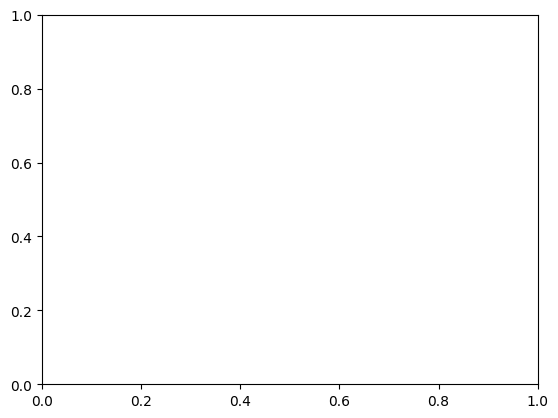

In [294]:
# make stacked area chart on topics_over_time using Timestamp on x, frequency on y, with topic as color in plotly
import numpy as np
import matplotlib.pyplot as plt

# Create data
y1=topics_over_time[topics_over_time["Topic"] == 0]["Frequency"]
y2=topics_over_time[topics_over_time["Topic"] == 1]["Frequency"]
y3=topics_over_time[topics_over_time["Topic"] == 2]["Frequency"]

# Basic stacked area chart.
plt.stackplot(topics_over_time["Timestamp"].unique(), y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')


In [281]:
# make sure that each topic has a date from 2018-01-01 to 2021-01-01
# if not, add a row with 0 frequency
# this is because the bertopic library does not return a row for each date
# if there are no reviews for that date
# so we need to add those rows manually

# get all dates from 2018-01-01 to 2021-01-01
dates = pd.date_range(start="2018-01-01", end="2021-01-01", freq="MS").to_list()

# get all topics
topics = topics_over_time["Topic"].unique().tolist()

# create a dataframe with all combinations of dates and topics
df = pd.DataFrame(columns=["Timestamp", "Topic"])
for date in dates:
    for topic in topics:
        df = df.append({"Timestamp": date, "Topic": topic}, ignore_index=True)

# merge the dataframe with all combinations of dates and topics with the topics_over_time dataframe
# this will add rows for all combinations of dates and topics that are not in the topics_over_time dataframe
# and set the frequency to 0
topics_over_time = pd.merge(df, topics_over_time, how="left", on=["Timestamp", "Topic"])
topics_over_time["Frequency"] = topics_over_time["Frequency"].fillna(0)


In [283]:
topics_over_time[topics_over_time["Topic"] == 6]

,Timestamp,Topic,Words,Frequency,Name
14,2018-01-01,6,NaN,0.0,NaN
63,2018-02-01,6,NaN,0.0,NaN
112,2018-03-01,6,NaN,0.0,NaN
161,2018-04-01,6,NaN,0.0,NaN
210,2018-05-01,6,NaN,0.0,NaN
259,2018-06-01,6,NaN,0.0,NaN
308,2018-07-01,6,NaN,0.0,NaN
357,2018-08-01,6,NaN,0.0,NaN
406,2018-09-01,6,NaN,0.0,NaN
455,2018-10-01,6,NaN,0.0,NaN


In [246]:
topics_over_time.to_csv("over_time.csv")

In [231]:
topic_model.find_topics("remote work", top_n=5)

([22, 43, 0, 23, 41],
 [0.456661485830967,
  0.42564606340498834,
  0.4251255143083059,
  0.4240586213648238,
  0.42346254450340676])